# Regularização

In [1]:
import pandas as pd

In [2]:
!ls data/

Advertising.csv  Portland_housePrices.csv


In [3]:
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)

In [4]:
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
X = dados_adv.loc[:,['TV', 'radio', 'newspaper']]
y = dados_adv.loc[:,['sales']]

In [6]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [10]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(100, 3)
(100, 1)
(100, 3)
(100, 1)


- Vamos fazer o fit de uma regressão linear utilizando o OLS

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear = LinearRegression().fit(X_train, y_train)

- Listando os coeficientes

In [13]:
print(linear.coef_)

[[0.04359498 0.19927632 0.0146631 ]]


- Temos então a equação  $sales \approx 0.04*TV + 0.2*radio + 0.014*newspaper

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score_test = r2_score(y_test, linear.predict(X_test))
print(f"R2 Score (test): {r2_score_test}")

R2 Score (test): 0.8721004816045135


In [16]:
r2_score_train = r2_score(y_train, linear.predict(X_train))
print(f"R2 Score (train): {r2_score_train}")

R2 Score (train): 0.9042613648908892


- importante para verificar se estamos caindo em overfitting.

## Regressão Ridge - L2

In [17]:
import numpy as np

In [18]:
alphas = 10**np.linspace(-2, 3, 100)
alphas

array([1.00000000e-02, 1.12332403e-02, 1.26185688e-02, 1.41747416e-02,
       1.59228279e-02, 1.78864953e-02, 2.00923300e-02, 2.25701972e-02,
       2.53536449e-02, 2.84803587e-02, 3.19926714e-02, 3.59381366e-02,
       4.03701726e-02, 4.53487851e-02, 5.09413801e-02, 5.72236766e-02,
       6.42807312e-02, 7.22080902e-02, 8.11130831e-02, 9.11162756e-02,
       1.02353102e-01, 1.14975700e-01, 1.29154967e-01, 1.45082878e-01,
       1.62975083e-01, 1.83073828e-01, 2.05651231e-01, 2.31012970e-01,
       2.59502421e-01, 2.91505306e-01, 3.27454916e-01, 3.67837977e-01,
       4.13201240e-01, 4.64158883e-01, 5.21400829e-01, 5.85702082e-01,
       6.57933225e-01, 7.39072203e-01, 8.30217568e-01, 9.32603347e-01,
       1.04761575e+00, 1.17681195e+00, 1.32194115e+00, 1.48496826e+00,
       1.66810054e+00, 1.87381742e+00, 2.10490414e+00, 2.36448941e+00,
       2.65608778e+00, 2.98364724e+00, 3.35160265e+00, 3.76493581e+00,
       4.22924287e+00, 4.75081016e+00, 5.33669923e+00, 5.99484250e+00,
      

- Vamos testar vários valores de alpha no range de 10^-2..10^3

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [20]:
coefs = []
mses = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_.ravel().tolist())
    mses.append(mean_squared_error(y_test, ridge.predict(X_test)))


In [21]:
coefs = np.array(coefs)

In [22]:
coefs.shape

(100, 3)

In [23]:
import matplotlib.pyplot as plt

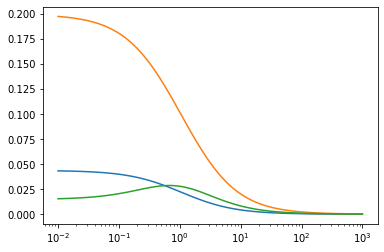

In [24]:
plt.plot(alphas, coefs)
plt.xscale('log')

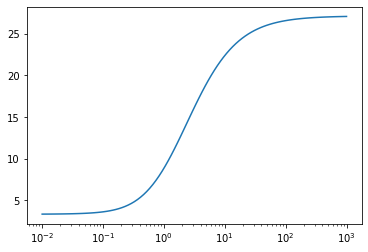

In [25]:
plt.plot(alphas, mses)
plt.xscale('log')

- Utilizar validação cruzada para encontrar o valor ótimo do alpha

In [26]:
from sklearn.linear_model import RidgeCV

In [27]:
ridgecv = RidgeCV(alphas, normalize=True, scoring='neg_mean_squared_error')

- Vamos realizar o *fit* do nosso modelo com validação cruzada - vamos fazer múltiplos *fits*, um para cada valor de alpha

In [28]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.12332403e-02, 1.26185688e-02, 1.41747416e-02,
       1.59228279e-02, 1.78864953e-02, 2.00923300e-02, 2.25701972e-02,
       2.53536449e-02, 2.84803587e-02, 3.19926714e-02, 3.59381366e-02,
       4.03701726e-02, 4.53487851e-02, 5.09413801e-02, 5.72236766e-02,
       6.42807312e-02, 7.22080902e-02, 8.11130831e-02, 9.11162756e-02,
       1.02353102e-01, 1.14975700e-0...
       1.09749877e+02, 1.23284674e+02, 1.38488637e+02, 1.55567614e+02,
       1.74752840e+02, 1.96304065e+02, 2.20513074e+02, 2.47707636e+02,
       2.78255940e+02, 3.12571585e+02, 3.51119173e+02, 3.94420606e+02,
       4.43062146e+02, 4.97702356e+02, 5.59081018e+02, 6.28029144e+02,
       7.05480231e+02, 7.92482898e+02, 8.90215085e+02, 1.00000000e+03]),
        normalize=True, scoring='neg_mean_squared_error')

In [29]:
print(ridgecv.alpha_) # valor de alpha que fez mais sentido

0.01


In [30]:
print(ridgecv.coef_)

[[0.04318375 0.19716819 0.01537597]]


In [31]:
r2_score_test = r2_score(y_test, ridgecv.predict(X_test))
print(f"R2 Score (test): {r2_score_test}")

R2 Score (test): 0.8715086847396623


In [32]:
r2_score_train = r2_score(y_train, ridgecv.predict(X_train))
print(f"R2 Score (train): {r2_score_train}")

R2 Score (train): 0.9041842287636269


## Regularização L1 - *Lasso*

In [33]:
from sklearn.linear_model import Lasso

In [34]:
coefs = []
mses = []

for alpha in alphas:
    lasso= Lasso(alpha=alpha, normalize=True)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_.ravel().tolist())
    mses.append(mean_squared_error(y_test, lasso.predict(X_test)))

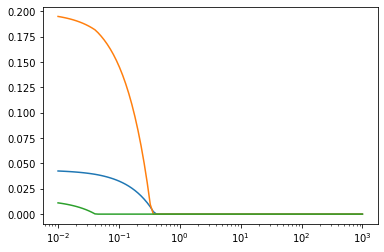

In [35]:
plt.plot(alphas, coefs)
plt.xscale('log')

- Os coeficientes são puxados de forma bem abrupta para zero.

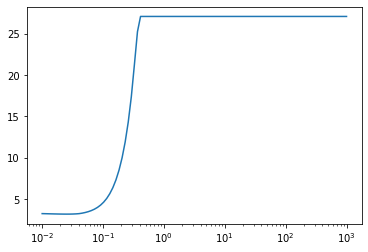

In [36]:
plt.plot(alphas, mses)
plt.xscale('log')

- O erro parte de um valor bem pequeno e cresce de forma muito rápida de acordo com o valor do alpha

- Vamos usar a validação cruzada para encontrar o "melhor" valor de $\alpha

In [37]:
from sklearn.linear_model import LassoCV

In [39]:
lassocv = LassoCV(alphas=alphas, normalize=True)
lassocv.fit(X_train, y_train.values.ravel())

LassoCV(alphas=array([1.00000000e-02, 1.12332403e-02, 1.26185688e-02, 1.41747416e-02,
       1.59228279e-02, 1.78864953e-02, 2.00923300e-02, 2.25701972e-02,
       2.53536449e-02, 2.84803587e-02, 3.19926714e-02, 3.59381366e-02,
       4.03701726e-02, 4.53487851e-02, 5.09413801e-02, 5.72236766e-02,
       6.42807312e-02, 7.22080902e-02, 8.11130831e-02, 9.11162756e-02,
       1.02353102e-01, 1.14975700e-0...
       6.89261210e+01, 7.74263683e+01, 8.69749003e+01, 9.77009957e+01,
       1.09749877e+02, 1.23284674e+02, 1.38488637e+02, 1.55567614e+02,
       1.74752840e+02, 1.96304065e+02, 2.20513074e+02, 2.47707636e+02,
       2.78255940e+02, 3.12571585e+02, 3.51119173e+02, 3.94420606e+02,
       4.43062146e+02, 4.97702356e+02, 5.59081018e+02, 6.28029144e+02,
       7.05480231e+02, 7.92482898e+02, 8.90215085e+02, 1.00000000e+03]),
        normalize=True)

In [40]:
print(lassocv.alpha_)

0.01


In [41]:
print(lassocv.coef_)

[0.04252498 0.19494323 0.01109123]
